# Question 1

A hypothesis is an idea that can be tested. A statement is testable when there's data related to it. The null hypothesis is the hypothesis to be tested, and the alternitive is anything else. 

The null hypothesis is always a statement that there is no difference between the sample mean and the population mean.

The alternative hypothesis is simply a claim that the null ypothesis is not true.

Generally, the researcher is trying to reject the null hypothesis since the null hypothesis usually implies the status quo, and the alternitive hypothesis usually refers to the change or innovation.

# Question 2

xi are the individual data points in the sample.

x̄ is the average (mean) of those individual data points, representing the sample.

𝜇 is the true average of the entire population (we would like to know the data and the analysis of the population, but we cannot measure it directly.

𝜇0 is the "hypothesized" population average, which we are testing to see if it is true.

The sentence implies that we are attempting to draw conclusions about the average of entire group or population(𝜇) based on the sample (x̄), not just the smaller sample of data we obtained, when we perform a test (such as a hypothesis test). The result we get applies to the population as a whole, not just the sample.

# Question 3

Imagining a world where the null hypothesis is true helps to frame how we approach the p-value in hypothesis testing. We test the plausibility of the null hypothesis by calculating how often we should see similar or more extreme results if the null hypothesis is valid. 

# Question 4

The null hypothesis: typically a statement that there's no effect, no difference, or that any observed differences are due to random chance.

p-value: the the probability that a statistic is as or more extreme than the observed statistic if the null hypothesis is true. It tells us how probable it is that we could have gotten the results we did just by chance.

A very small p-value implies that we have very strong evidence against the null hypothesis because it suggests that the observed data is unlikely to have occurred by random chance if the null hypothesis is true. A small p-value pushes us towards rejecting the null hypothesis in favor of an alternative explanation.

# Question 5

Null Hypothesis (H0): There is no preference for head-tilting direction, meaning that couples tilt their heads to the right or left with equal probability, p=0.5.

Observed Data: In the actual study, 80 out of 124 couples (64.5%) tilted their heads to the right.

In [1]:
import numpy as np

# Parameters
n_couples = 124  # Number of couples in the study
observed_right_tilts = 80  # Observed number of couples tilting to the right
prob_right = 0.5  # Probability of tilting right under the null hypothesis
n_simulations = 10000  # Number of simulations

# Simulate: generate random samples of right tilts for 124 couples, repeated 10,000 times
simulated_right_tilts = np.random.binomial(n_couples, prob_right, n_simulations)

# Calculate the p-value: count how many times the simulated number of right tilts is >= 80
p_value = np.sum(simulated_right_tilts >= observed_right_tilts) / n_simulations

# Output the result
print(f"Simulated p-value: {p_value:.4f}")


Simulated p-value: 0.0007


Based on the provided table, p-value = 0.0006 falls in the range 0.001 >= p, indicating very strong evidence against the null hypothesis.

# Question 6

No, a smaller p-value cannot definitively prove that the null hypothesis is false. A p-value simply measures how likely the observed data would occur if the null hypothesis were true. 

Recarding Fido, a p-value cannot definitively prove innocence (null hypothesis is true) or guilt (null hypothesis is false). Even with a very low p-value, it only indicates strong evidence against Fido's innocence, but proof requires more than statistical significance.

A p-value threshold (commonly 0.05 or lower) is used to make decisions, but no p-value—no matter how high or low—can provide absolute proof in either direction.

# Question 7

In [2]:
import pandas as pd
import numpy as np

# Sample data to simulate HealthScoreChange
data = {'PatientID': range(1, 11), 
        'HealthScoreBefore': [75, 82, 65, 90, 58, 74, 60, 80, 68, 85], 
        'HealthScoreAfter': [78, 85, 63, 92, 60, 76, 62, 83, 70, 87]}

# Create the DataFrame
patient_data = pd.DataFrame(data)

# Calculate the change in health score
patient_data['HealthScoreChange'] = patient_data['HealthScoreAfter'] - patient_data['HealthScoreBefore']


In [3]:

print(pd.DataFrame({'HealthScoreChange': patient_data['HealthScoreChange'],
                    '> 0 ?': patient_data['HealthScoreChange']>0}))


   HealthScoreChange  > 0 ?
0                  3   True
1                  3   True
2                 -2  False
3                  2   True
4                  2   True
5                  2   True
6                  2   True
7                  3   True
8                  2   True
9                  2   True


In [4]:
random_difference_sign = np.random.choice([-1, 1], size=len(patient_data))
pd.DataFrame({'HealthScoreChange': random_difference_sign*patient_data['HealthScoreChange'].abs(),
              '> 0 ?': (random_difference_sign*patient_data['HealthScoreChange'])>0})


,HealthScoreChange,> 0 ?
0,-3,False
1,-3,False
2,2,False
3,-2,False
4,2,True
5,2,True
6,-2,False
7,3,True
8,-2,False
9,2,True


In [5]:
np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000  # experiment with this... what does this do?


In [6]:

# Define the number of simulations
number_of_simulations = 10000  # You can adjust this as needed

# Initialize an array to store simulation results
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# Now you can run your loop
for i in range(number_of_simulations):
    random_improvement = np.random.choice([0, 1], size=len(patient_data), replace=True)
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()


In [7]:
observed_test_statistic = (patient_data.HealthScoreChange>0).mean()
simulated_test_statistics = IncreaseProportionSimulations_underH0random


In [8]:
# Define the population parameter under the null hypothesis
population_parameter_value_under_H0 = 0.5  # Assuming a null hypothesis of no effect


In [9]:
SimTestStats_as_or_more_extreme_than_ObsTestStat = \
    abs(simulated_test_statistics - population_parameter_value_under_H0) >= \
    abs(observed_test_statistic - population_parameter_value_under_H0) 


In [10]:
pd.DataFrame({'(Simulated) Test Statistic': simulated_test_statistics,
              '>= '+str(observed_test_statistic)+" ?": ['>= '+str(observed_test_statistic)+" ?"]*number_of_simulations, 
              '"as or more extreme"?': SimTestStats_as_or_more_extreme_than_ObsTestStat})


,(Simulated) Test Statistic,>= 0.9 ?,"""as or more extreme""?"
0,0.7,>= 0.9 ?,False
1,0.4,>= 0.9 ?,False
2,0.3,>= 0.9 ?,False
3,0.5,>= 0.9 ?,False
4,0.8,>= 0.9 ?,False
...,...,...,...
9995,0.4,>= 0.9 ?,False
9996,0.1,>= 0.9 ?,True
9997,0.4,>= 0.9 ?,False
9998,0.6,>= 0.9 ?,False


In [11]:
SimTestStats_as_or_more_extreme_than_ObsTestStat = \
    simulated_test_statistics >= observed_test_statistic


- The two-sided test checks for deviations in both directions (positive or negative changes in health score).
- The one-sided test focuses only on positive changes (vaccine improvement).
- p-value comparison: A one-sided test is generally more sensitive and will often have a smaller p-value than a two-sided test when the observed effect is in the expected direction, as you're concentrating all your statistical power on one hypothesis.

### Summary 

Sure! Here’s a summary of our exchanges regarding the code adjustments for your vaccine data analysis assignment:

---

### Summary of Exchanges:

1. **Initial Inquiry**:
   - You introduced the topic of one-sided (one-tailed) tests versus two-sided (two-tailed) tests, asking for adjustments in code from the "Demo II of Week 5 TUT" to compute a p-value for a one-sided hypothesis test.

2. **Code Breakdown**:
   - I provided a breakdown of the code you shared, explaining the steps involved in calculating health score changes, simulating random improvements, and how the observed test statistic is computed. 
   - I clarified concepts like how the proportion of random improvements is calculated, the significance of the number of simulations, and the identification of extreme test statistics.

3. **Modifications for One-Sided Test**:
   - I guided you on how to modify the condition that checks for extreme test statistics to focus only on improvements (greater than or equal to the observed test statistic), suitable for a one-sided test.

4. **Error Resolution**:
   - You encountered a `NameError` related to the `patient_data` variable, and I suggested creating a sample DataFrame or loading your data to define it.
   - After defining `patient_data`, you faced another `NameError` regarding the `IncreaseProportionSimulations_underH0random` variable. I recommended initializing this variable as a NumPy array before using it in the simulation loop.
   - A subsequent `NameError` occurred due to the absence of the `population_parameter_value_under_H0` variable. I advised defining it to represent the expected proportion under the null hypothesis (set to 0.5).

5. **Complete Code Example**:
   - Finally, I provided a complete example of the modified code that includes definitions for all necessary variables, simulation loops, and calculations for both observed and simulated test statistics, ensuring everything is structured correctly.

---

Feel free to modify any part of this summary to better fit your assignment requirements! If you need any additional information or clarifications, just let me know!

### Link

https://chatgpt.com/share/67094c9b-29ec-8010-af8a-592e11d82360

# Question 8

## Problem Introduction

Ronald Fisher and Dr. Muriel Bristol's initial experiment investigated if the sequence in which tea and milk were poured altered the flavour. We repeat the experiment with STA130 students in this analysis to see if they can tell which was poured first: milk or tea. Of the 80 students in our survey, 49 correctly identified the pouring sequence. To determine whether these results may have been the result of random guesswork or if they clearly show a preference, we will run a hypothesis test.

### Null hypothesis

$H_0$: p = 0.5
<br>
<br> Formal: The null hypothesis is that the proportion of students correctly identifying the order of pouring is equal to the probability of guessing correctly by chance (i.e., 50%).
<br>
<br> Informal: We believe that the students do not have any special ability to distinguish the order of pouring tea and milk and are essentially guessing.

### Alternative hypothesis

Formal: $H_A$: p ≠ 0.5
<br>
<br> This suggests that the proportion of students correctly identifying the order is different from 0.5, which means that they may have some ability to discern the order.

## Quantitative Analysis

### Observed proportion

p = 49 / 80 = 0.6125

### p-value 

The p-value is the proportion of simulated samples where the proportion of correct guesses is as extreme or more extreme than the observed proportion of 0.6125.

p-value = (Number of simulated proportions ≥ observed proportion) / Total number of simulations 

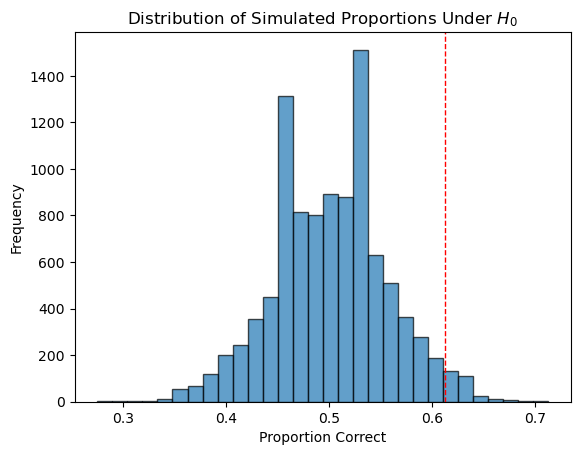

0.0294

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Parameters
n_students = 80
n_correct = 49
observed_proportion = n_correct / n_students
n_simulations = 10000
null_proportion = 0.5

# Simulate the null hypothesis
simulated_proportions = np.random.binomial(n_students, null_proportion, n_simulations) / n_students

# Calculate p-value
p_value = np.mean(simulated_proportions >= observed_proportion)

# Plotting the distribution of simulated proportions
plt.hist(simulated_proportions, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(observed_proportion, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Simulated Proportions Under $H_0$')
plt.xlabel('Proportion Correct')
plt.ylabel('Frequency')
plt.show()

p_value

## Conclusion

The p-value falls on the range [0.01, 0.05], which suggests moderate evidence against the null hypothesis. 

If we set the significance level to be 0.05, the p-value is below the significance level. We reject the null hypothesis in this case, suggesting that students have a statistically significant ability to identify the order of pouring tea and milk.

### Summary

Here’s a summary of our exchanges regarding the Fisher's Tea Experiment and related analysis:

---

### Fisher's Tea Experiment: Statistical Analysis Summary

1. **Problem Introduction:**
   - We discussed a modern replication of Fisher’s famous tea experiment, involving 80 STA130 students who were asked to discern whether tea or milk was poured first. Of the 80 students, 49 correctly identified the order of pouring. The objective was to determine whether this result could have occurred by random guessing or if students had some ability to discern the order.
   
2. **Null Hypothesis ( \( H_0 \) ) and Alternative Hypothesis ( \( H_A \) ):**
   - **\( H_0 \)**: The proportion of students who correctly identify the order of pouring is 0.5 (indicating random guessing).
   - **\( H_A \)**: The proportion of students correctly identifying the order differs from 0.5, suggesting that students may have an ability to tell the difference.
   
   I provided both formal and informal interpretations of the null hypothesis and alternative hypothesis, along with how we frame the hypotheses based on this experiment.

3. **Quantitative Analysis:**
   - We used a **simulation approach** to generate a sampling distribution under the null hypothesis, assuming a 50% chance of correct guessing. This involved running 10,000 simulations where each simulated sample was based on 80 students.
   - The **observed test statistic** was the proportion of correct guesses, \( \hat{p} = 0.6125 \), based on 49 out of 80 students answering correctly.
   
4. **P-value Calculation Explanation:**
   - I explained that the p-value represents the probability of obtaining a result as extreme as the observed proportion (0.6125) under the null hypothesis. The p-value is calculated by determining how many simulated proportions from the 10,000 trials are greater than or equal to the observed value of 0.6125, divided by the total number of simulations.
   - I provided the formula for the p-value and explained its significance in hypothesis testing: a small p-value suggests that the observed result is unlikely under the null hypothesis, providing evidence against it.

5. **Code Implementation:**
   - I shared Python code to simulate the experiment using `np.random.binomial` to simulate 10,000 samples of 80 observations, calculate the proportion of correct guesses, and compute the p-value.
   - I explained the use of `np.random.seed()` for reproducibility, provided a histogram to visualize the simulated proportions, and marked the observed proportion for comparison.

6. **Interpretation of Results:**
   - The interpretation of the p-value helps in determining whether to reject or fail to reject the null hypothesis. If the p-value is less than a significance level of 0.05, we conclude that the students’ ability to discern the order of pouring is statistically significant.

---

This summary encapsulates the key points we discussed, covering the hypothesis test, p-value calculation, and simulation methodology. Let me know if you need any further clarification or adjustments before submission!

### Link

https://chatgpt.com/share/670963fe-7bb0-8010-a927-c0ff762b980f

# Question 9

Yes